In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In this assignment, your goal will be to experiment with some simple bandit learning algorithms
by implementing them from scratch and comparing their performance in terms of (1) the average
accumulated reward as well as (2) the proportion of time the optimal action, i.e., the one with the
highest expected reward, is taken.

You should provide a report including plots describing your results and a link to an online repository
with commented and reproducible code. You should also provide a readme file that can make it easy
for anyone to replicate the results in this assignment. Note that modern machine learning conferences
e.g., NeurIPS, require submission of documented code for reproducibility of reported results.

Each part is worth 25 marks. You will be graded on correctness, clarity and reproducibility of
your results. The assignment is due on June 13th. It may be done individually or in pairs. Both
participants in a pair will receive the same grade and no preference will be given to people working
individually or in pairs.

1 Part 1

We start by looking at a simple bandit problem with stationary reward distributions. Consider the socalled k-armed testbed, with k = 10, with normally distributed rewards. Generate a set of ten means µ1, . . . , µ10 from a N(0, 1) distribution and suppose that the arms 1 through 10 have N(µi, 1) reward distributions where i = 1, . . . , 10. You goal is to learn the action values corresponding to each of the 10 arms, i.e., the expected rewards q∗ (a) for a = 1, . . . 10 using the different methods we discussed for doing so.

In [3]:
# Number of arms
Arms = 10
# Number of steps
steps = 1000
# Generate true means for the 10 arms from N(0, 1)
np.random.seed(42)
Means = (np.random.normal(0, 1, Arms))

In [4]:
Means

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

• greedy with non-optimistic initial values. Initialize the action value estimates to 0 and use the incremental implementation of the simple average method.

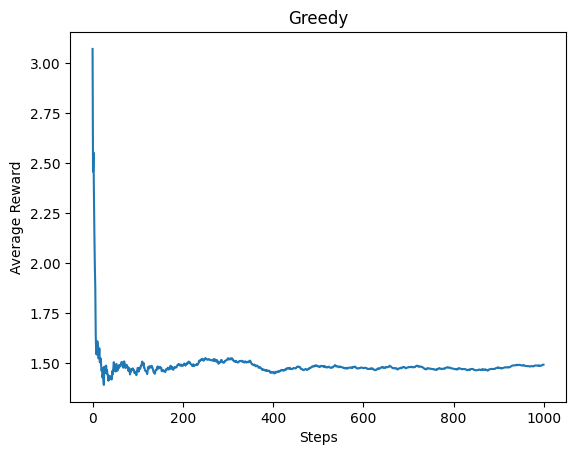

3
[ 1.0731655  -1.64682027  0.83265911  1.49260252  1.15093838 -1.00495576
  0.30086019 -0.12799323 -1.80604289  1.3430161 ]
1.492602519800999


In [61]:
# Initialize Q and N
Q = np.zeros(Arms)
N = np.ones(Arms)

# Run every action once 

Q = (np.random.normal(Means, 1, Arms))

# This array is just for ploting purposes 
Reward_list = []

for step in range(steps):
    #Get Highest number in Q
    Highest_Number = np.argmax(Q)
    
    #Get Reward
    Reward = (np.random.normal(Means[Highest_Number], 1))

    Reward_list.append(Reward)

    # Update number of N_i by 1
    N[Highest_Number] += 1

    # Update Q
    Q[Highest_Number] += (Reward - Q[Highest_Number]) / N[Highest_Number]

plt.plot(np.arange(steps), np.cumsum(np.array(Reward_list)) / (np.arange(steps) + 1))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Greedy')
plt.show()

print(Highest_Number)
print(Q)
print(Q[Highest_Number])


• epsilon-greedy with different choices of epsilon. Here, you will need to explain how you choose the value of ϵ. One option is to use pilot runs: to take a few example bandit problems and try a few settings of epsilon on these problems to track the evolution of the rewards curve and picking one that gives good results.

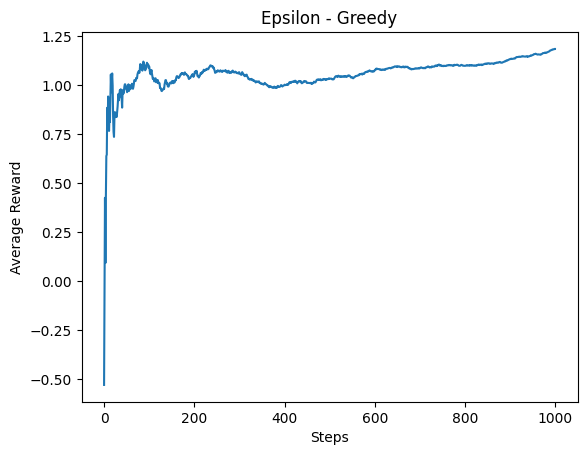

6
[ 0.18041072 -0.0061693   0.84303829  1.42494961 -0.1083633  -0.24820015
  1.51652206  0.8871404  -0.46730375  0.55213593]
1.5165220588029804


In [60]:
epsilon = 0.5
min_epsilon = 0.1
decay_rate = 0.0004

# Initialize Q and N
Q = np.zeros(Arms)
N = np.ones(Arms)

# Run every action once 

Q = (np.random.normal(Means, 1, Arms))

# This array is just for ploting purposes 
Reward_list = []

for step in range(steps):
    # random.random() takes a value between 0 and 1
    if random.random() < epsilon: 
        # Get Random number
        Highest_Number = random.randint(0, 9)
    else:
        #Get Highest number in Q
        Highest_Number = np.argmax(Q)
    
    #Get Reward
    Reward = (np.random.normal(Means[Highest_Number], 1))

    Reward_list.append(Reward)

    # Update number of N_i by 1
    N[Highest_Number] += 1

    # Update Q
    Q[Highest_Number] += (Reward - Q[Highest_Number]) / N[Highest_Number]

    epsilon = max(min_epsilon, epsilon - decay_rate)

plt.plot(np.arange(steps), np.cumsum(np.array(Reward_list)) / (np.arange(steps) + 1))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Epsilon - Greedy')
plt.show()

print(Highest_Number)
print(Q)
print(Q[Highest_Number])

6